### Import of Libraries

In [58]:
import pandas as pd
pd.set_option('display.precision',3)
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

from sklearn import set_config
set_config(display='text') # estimators will be displayed as text, not as diagram (default is 'diagram')

import warnings

warnings.filterwarnings('ignore')



from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


We load the crabs.csv file.

In [3]:
uploaded = files.upload()

Saving crabs.csv to crabs.csv


### Initial Study of the Dataset

In [4]:
crabs_data = pd.read_csv("crabs.csv")

crabs_data = crabs_data.rename(columns = {'sp':'species','FL':'Frontal Lobe','RW':'Rear Width','CL':'Carapace Midline','CW':'Maximum Width','BD':'Body Depth'})

crabs_data['species'] = crabs_data['species'].map({'B':'Blue','O':'Orange'})
crabs_data['sex'] = crabs_data['sex'].map({'M':'Male','F':'Female'})

In [5]:
crabs_data.describe(include="all")

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
count,200,200,200.000,200.000,200.000,200.000,200.000,200.000
unique,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Blue,Male,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,100,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,25.500,15.583,12.738,32.105,36.415,14.030
std,NaN,NaN,14.467,3.495,2.573,7.119,7.872,3.425
min,NaN,NaN,1.000,7.200,6.500,14.700,17.100,6.100
25%,NaN,NaN,13.000,12.900,11.000,27.275,31.500,11.400
50%,NaN,NaN,25.500,15.550,12.800,32.100,36.800,13.900
75%,NaN,NaN,38.000,18.050,14.300,37.225,42.000,16.600


In [6]:
crabs_data.shape

(200, 8)

In [7]:
crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2


The goal is to separate the 200 crabs into four classes, given by the 2x2 configurations for sex (male/female) and species (blue/orange).

In [8]:
crabs_data['class'] = crabs_data.species + crabs_data.sex

crabs_data['class'].value_counts()

BlueMale        50
BlueFemale      50
OrangeMale      50
OrangeFemale    50
Name: class, dtype: int64

In [9]:
crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale


We'll start with a basic exploration of the data set.

In [10]:
data_columns = ['Frontal Lobe','Rear Width','Carapace Midline','Maximum Width','Body Depth']
crabs_data[data_columns].describe()

,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
count,200.000,200.000,200.000,200.000,200.000
mean,15.583,12.738,32.105,36.415,14.030
std,3.495,2.573,7.119,7.872,3.425
min,7.200,6.500,14.700,17.100,6.100
25%,12.900,11.000,27.275,31.500,11.400
50%,15.550,12.800,32.100,36.800,13.900
75%,18.050,14.300,37.225,42.000,16.600
max,23.100,20.200,47.600,54.600,21.600


Boxplot of the relevant features.


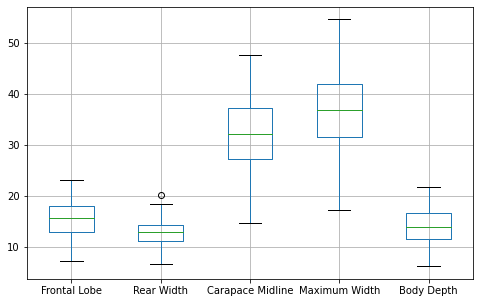

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
crabs_data[data_columns].boxplot()


### Initial Visualization of the Classes

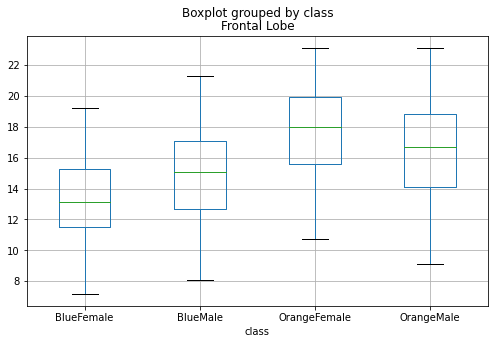

In [12]:
crabs_data.boxplot(column='Frontal Lobe', by = 'class', figsize=(8,5))

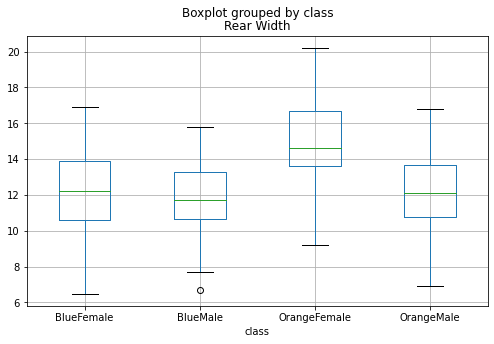

In [13]:
crabs_data.boxplot(column='Rear Width', by = 'class', figsize=(8,5))

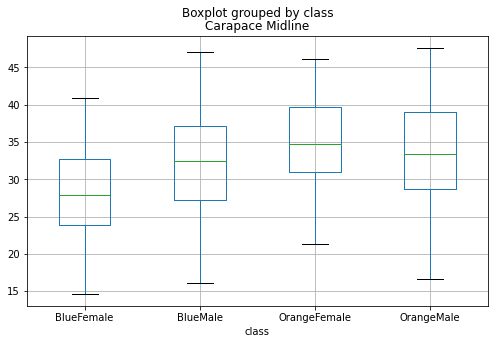

In [14]:
crabs_data.boxplot(column='Carapace Midline', by = 'class', figsize=(8,5))

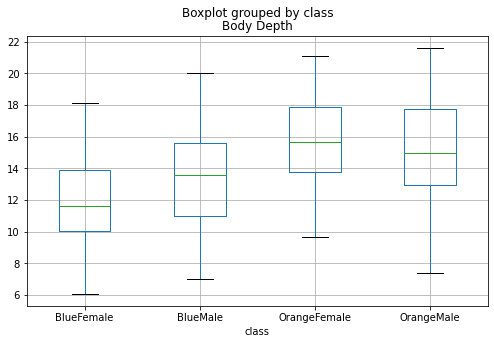

In [15]:
crabs_data.boxplot(column='Body Depth', by = 'class', figsize=(8,5))

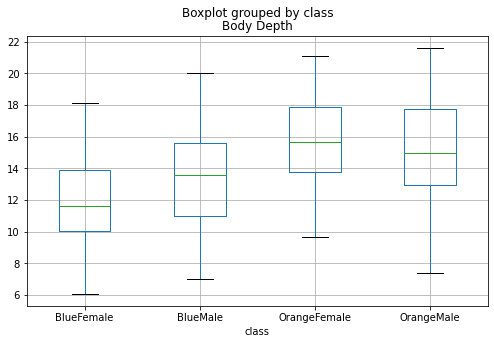

In [16]:
crabs_data.boxplot(column='Body Depth', by = 'class', figsize=(8,5))

Histograms Study.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc9f94d070>,
      dtype=object)

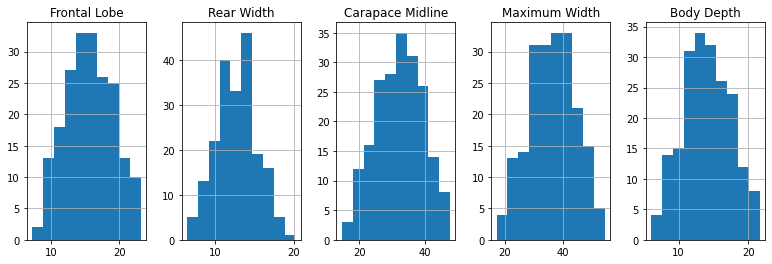

In [17]:
crabs_data[data_columns].hist(figsize=(16,4),layout=(1,6)) # layout = Tuple of (rows, columns) the histograms

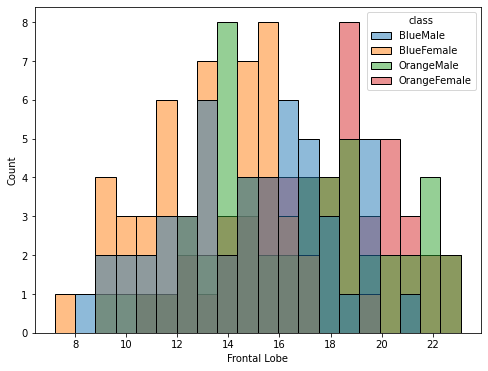

In [18]:
plt.figure(figsize=(8,6))
sns.histplot(crabs_data,x='Frontal Lobe',hue='class',bins=20)


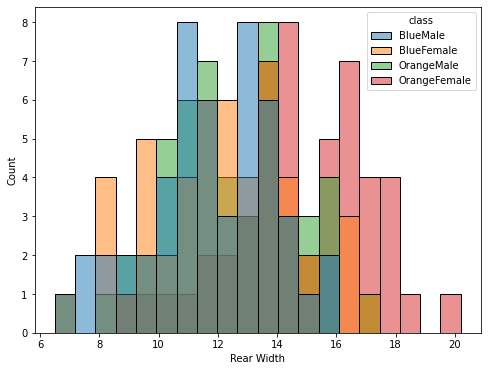

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(crabs_data,x='Rear Width',hue='class',bins=20)

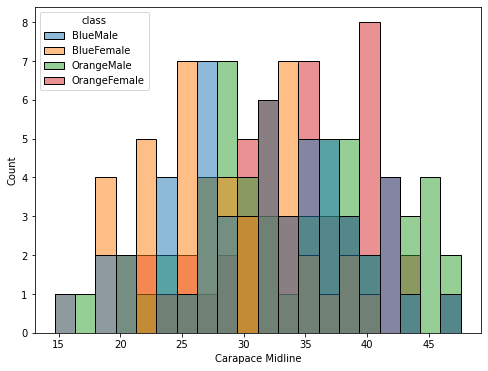

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(crabs_data,x='Carapace Midline',hue='class',bins=20)

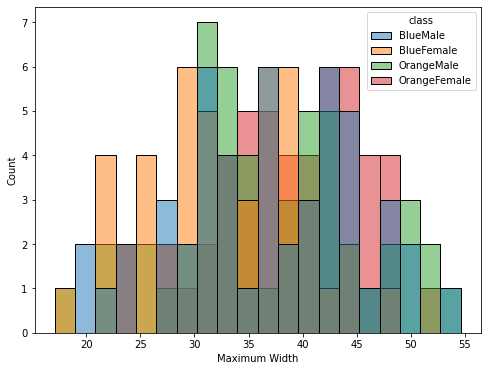

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(crabs_data,x='Maximum Width',hue='class',bins=20)

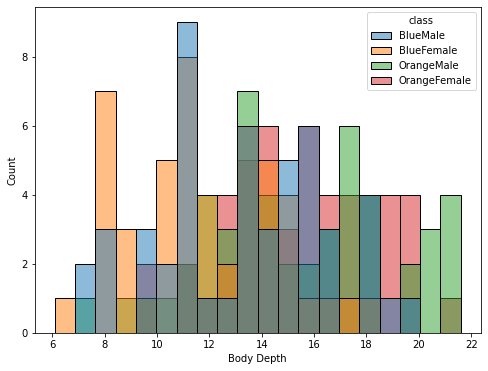

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(crabs_data,x='Body Depth',hue='class',bins=20)

Pairplot: allows us to plot pairwise relationships between variables within a dataset

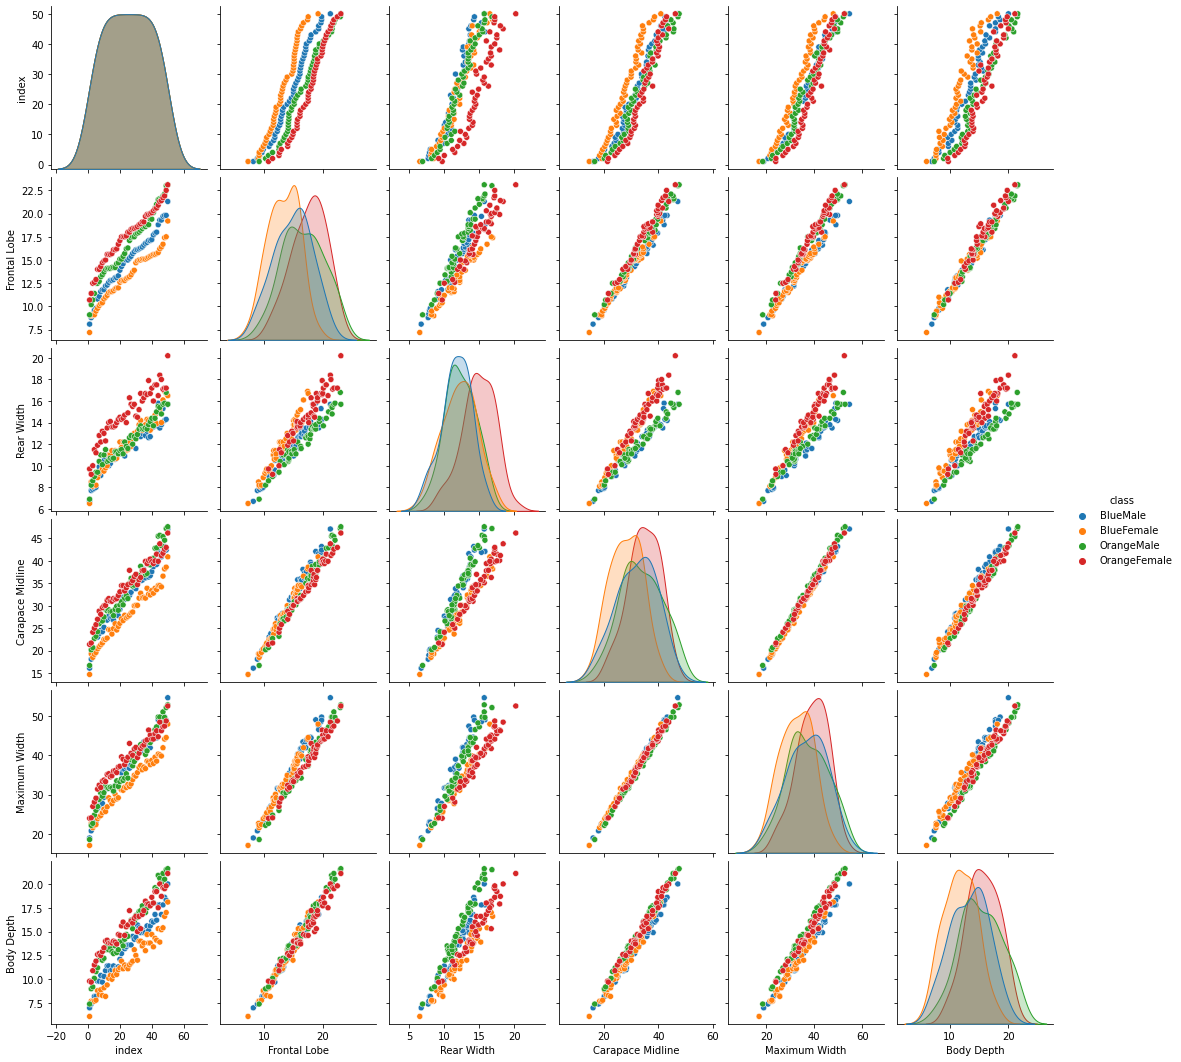

In [23]:
sns.pairplot(crabs_data,hue='class')

### Discussion for using PCA
The high dimensionality of the data makes it difficult to manage and understand it.

Dimensionality reduction methods allow
 

*   Reduce unnecessary dimensions/noise
*   Reduce the computational cost of learning
*   Visualize data in 2D/3D

## PCA
Now we are going to use PCA to make a better visualization of our data.

Data must be standardized in order to apply PCA.
We will standardize it. This will change the data so that all variables have mean 0 and standard deviation 1.

In [24]:
crabs_standardized = crabs_data.copy()
crabs_standardized[data_columns] = StandardScaler().fit_transform(crabs_data[data_columns])


In [25]:
crabs_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
index,200.0,2.550e+01,14.467,1.000,13.000,2.550e+01,38.000,50.000
Frontal Lobe,200.0,-7.105e-17,1.003,-2.404,-0.770,-9.465e-03,0.708,2.156
Rear Width,200.0,6.040e-16,1.003,-2.430,-0.677,2.396e-02,0.608,2.907
Carapace Midline,200.0,1.066e-16,1.003,-2.451,-0.680,-7.745e-04,0.721,2.182
Maximum Width,200.0,-4.974e-16,1.003,-2.460,-0.626,4.909e-02,0.711,2.316
Body Depth,200.0,0.000e+00,1.003,-2.321,-0.770,-3.820e-02,0.752,2.216


Let's proceed to use PCA.

The scikit-learn PCA method will return the explained variance ratio and all relevant PCA-related parameters.

You can use the explained variance ratio and the singular values to decide how many components to keep.

In [35]:
myPCA = PCA().fit(crabs_standardized[data_columns])

print(myPCA.explained_variance_ratio_) # returns a vector of the variance explained by each dimension.

print(myPCA.explained_variance_ratio_.cumsum()) # vector x such that x[i] returns the cumulative variance explained by the first i+1 dimensions

[9.57766957e-01 3.03370413e-02 9.32659482e-03 2.22707143e-03
 3.42335531e-04]
[0.95776696 0.988104   0.99743059 0.99965766 1.        ]


In [27]:
myPCA.singular_values_

array([30.94781021,  5.50790717,  3.05394742,  1.49233757,  0.58509446])

#### Screeplot
The scree plot is used to determine the number of
principal components to keep in a principal component analysis (PCA).

Text(0.5, 1.0, 'Scree Plot')

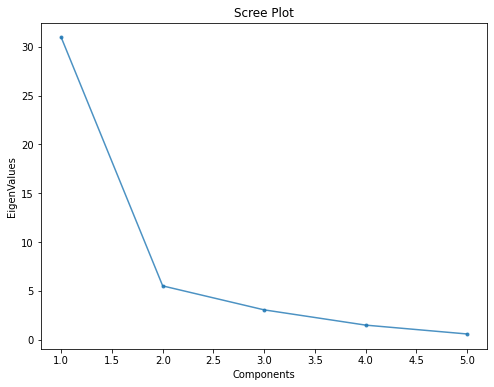

In [36]:
fig = plt.figure(figsize=(8,6))
# Scree Plot
plt.plot(range(1,len(myPCA.singular_values_)+1),myPCA.singular_values_,alpha=0.8,marker='.')
y_label = plt.ylabel('EigenValues')
x_label = plt.xlabel('Components')
plt.title('Scree Plot')

#### % of Explained Variance by Component

Text(0.5, 1.0, 'Percentage of variance explained by component')

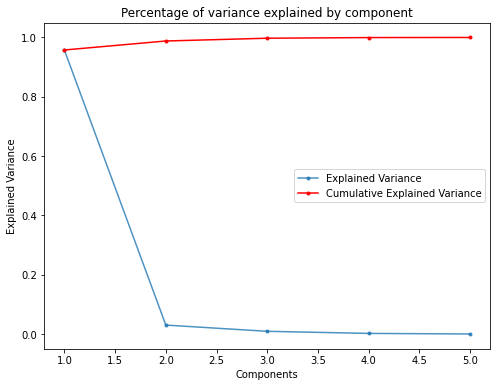

In [42]:
fig = plt.figure(figsize=(8,6))
plt.plot(range(1,len(myPCA.explained_variance_ratio_)+1),myPCA.explained_variance_ratio_,alpha=0.8,marker='.', label="Explained Variance")
y_label = plt.ylabel("Explained Variance")
x_label = plt.xlabel("Components")
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),np.cumsum(myPCA.explained_variance_ratio_),c='r',marker='.',label="Cumulative Explained Variance")
plt.legend()
plt.title('Percentage of variance explained by component')


We can also visualize the weights that the PCA assigns to each component.

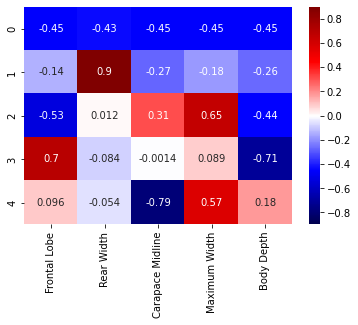

In [48]:
sns.heatmap(myPCA.components_,cmap='seismic',xticklabels = list(crabs_data.columns[3:-1]),
            vmin=-np.max(np.abs(myPCA.components_)),vmax=np.max(np.abs(myPCA.components_)),
            annot=True)

In [46]:
crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale


### PCA: Transformation and Visualization
Now we can transform our dataset using the "trained" PCA.

Generally, for visualization, 2 or 3 components are chosen.

We will choose 3 Components

In [50]:
transformed = myPCA.transform(crabs_standardized[data_columns])
crabs_standardized[['PC1','PC2','PC3']] = transformed[:,:3]

In [ ]:
crabs_standardized.head()

Visualize First 2 Components of PCA

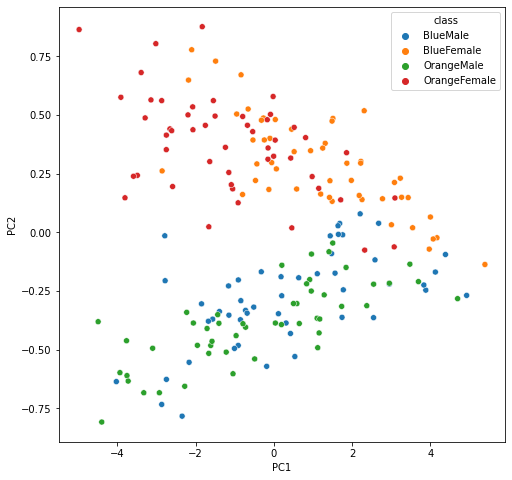

In [52]:
fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1',y='PC2',hue='class',data = crabs_standardized)

We can see that PCA does a good job with this data.

#### Visualize with 3 Components of PCA

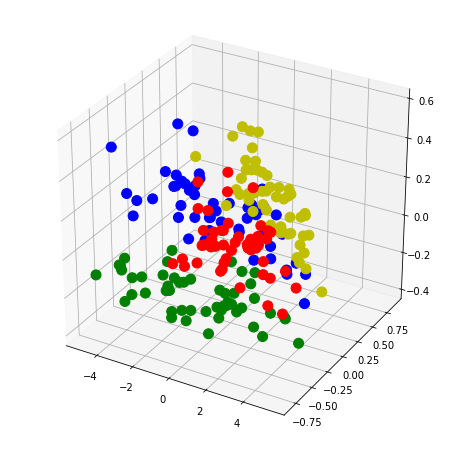

In [57]:
colors_crabs = {'BlueFemale': 'y', 'BlueMale': 'b', 'OrangeFemale': 'r', 'OrangeMale': 'g'}

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

plt.scatter(crabs_standardized.PC1,crabs_standardized.PC2,zs=crabs_standardized.PC3,
            depthshade=False, c=crabs_data['class'].apply(lambda x: colors_crabs[x]),s=100)


In [60]:
fig = px.scatter_3d(crabs_standardized,x='PC1',y='PC2',z='PC3',color = 'class')
fig.show()